use file cox-parsed_7214rows_with_labels.csv
It contains predicted and ground truth used in propublica
compute the fairness metrics by compas_screening_date

# get all time stamps

In [6]:
# First, install the autoreload extension
%load_ext autoreload
# Set autoreload to automatically reload modules
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithm import CR_0_20240118 as CR
from algorithm import CR_baseline_0_20240118 as CR_baseline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# read data

In [7]:
data = pd.read_csv('../../data/compas/preprocessed/cox-parsed_7214rows_with_labels_sorted_by_dates.csv')

In [8]:
data[:4]

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,predicted,ground_truth
0,10686,martin martinez,martin,martinez,2013-01-01,Male,1980-01-06,36,25 - 45,Caucasian,...,Low,2013-01-01,2013-01-01,2013-02-06,0,36,1186,0,0,0
1,5084,regina battle,regina,battle,2013-01-01,Female,1988-06-28,27,25 - 45,African-American,...,Low,2013-01-01,NaN,NaN,0,0,1186,0,0,0
2,604,devaughn brown,devaughn,brown,2013-01-01,Male,1993-07-25,22,Less than 25,African-American,...,Medium,2013-01-01,2013-12-30,2014-01-10,0,21,363,0,1,1
3,16,kortney coleman,kortney,coleman,2013-01-01,Female,1978-08-22,37,25 - 45,Caucasian,...,Low,2013-01-01,2013-01-01,2013-01-02,0,1,1186,0,0,0


<Axes: >

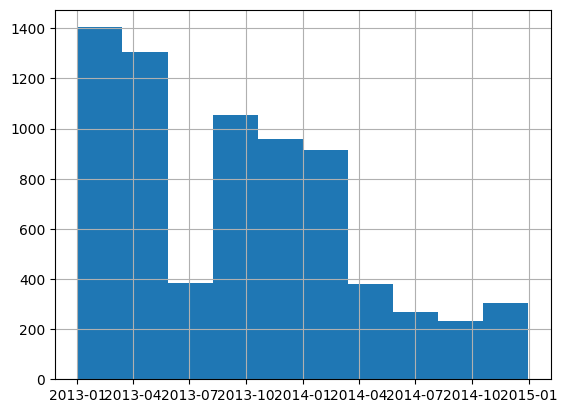

In [9]:
# get distribution of compas_screening_date
data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])
data['compas_screening_date'].hist()

In [10]:
# # get the month and year of the date
# data['month'] = data['compas_screening_date'].apply(lambda x: x.month)
# data['year'] = data['compas_screening_date'].apply(lambda x: x.year)
# print(data['month'][:4])

In [11]:
# # get data with in the first month
# data_first_month = data[data['compas_screening_date'] < '2013-08-01']

# process time series

In [26]:
# use CR to monitor tpr of different races over time
# a time window is a month

# Function to compute the time window key (e.g., year-month for 'month' windows)
def compute_time_window_key(row, window_type):
    if window_type == 'year':
        return row.year
    elif window_type == 'month':
        return f"{row.year}-{row.month}"
    elif window_type == 'week':
        return f"{row.year}-{row.week}"
    elif window_type == 'day':
        return f"{row.year}-{row.month}-{row.day}"

def belong_to_group(row, group):
    for key in group.keys():
        if row[key] != group[key]:
            return False
    return True

def monitorCR_baseline(timed_data, date_column, time_window_str, monitored_groups, threshold, alpha):
    number, unit = time_window_str.split()
    
    # Apply the function to compute the window key for each row
    timed_data['window_key'] = timed_data[date_column].apply(compute_time_window_key, args=(unit,))
    # Determine the start of a new window
    timed_data['new_window'] = timed_data['window_key'] != timed_data['window_key'].shift(1)
    
    DFMonitor = CR_baseline.CR_baseline(monitored_groups, alpha, threshold)
    DFMonitor.print()

    def process_each_tuple(row, DFMonitor):
        if row['new_window']:  # new window
            print("new window, row={}, {}".format(row['id'], row['compas_screening_date']))
            DFMonitor.print()
            DFMonitor.new_window()
        DFMonitor.insert(row)
        return 
    
    timed_data.apply(process_each_tuple, axis=1, args=(DFMonitor,))
    


In [27]:

monitored_groups = [{"race": 'African-American'}, {"race": 'Caucasian'}]
alpha = 0.5
threshold = 0.1
monitorCR_baseline(data, "compas_screening_date", "1 month", monitored_groups, threshold, alpha)



uf [False, False]
counters [0, 0]
counter_total 0
new window, row=10686, 2013-01-01 00:00:00
uf [False, False]
counters [0, 0]
counter_total 0
new window, row=9460, 2013-02-01 00:00:00
uf [True, True]
counters [325.0, 199.0]
counter_total 600.0
new window, row=4774, 2013-03-01 00:00:00
uf [True, True]
counters [470.5, 259.5]
counter_total 860.0
new window, row=7945, 2013-04-01 00:00:00
uf [True, True]
counters [529.25, 321.75]
counter_total 992.0
new window, row=5531, 2013-05-01 00:00:00
uf [True, True]
counters [558.625, 356.875]
counter_total 1068.0
new window, row=10243, 2013-06-03 00:00:00
uf [True, True]
counters [520.3125, 337.4375]
counter_total 1007.0
new window, row=3404, 2013-07-01 00:00:00
uf [True, True]
counters [295.15625, 197.71875]
counter_total 592.5
new window, row=6894, 2013-08-01 00:00:00
uf [True, True]
counters [187.578125, 157.859375]
counter_total 413.25
new window, row=8656, 2013-09-03 00:00:00
uf [True, True]
counters [331.7890625, 235.9296875]
counter_total 6